Computer Vision algorithms are noisy.

When we fit models to data we need robust methods for handling outliers/errors.

For example, in our discussion Interest Points, we discussed the ORB detector + descriptor.

ORB performed well, but like most keypoint algorithms, did suffer from outliers:

**The big idea here is that by fitting a model to a subset of our keypoints, we can use random sample consensus (RANSAC) to reject false matches.**

Let's go ahead and load up 2 example frames:

In [3]:
%pylab inline
import cv2

im1 = imread('/content/the_3d_world/data/small/image_00.jpg')
gray_1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)

Populating the interactive namespace from numpy and matplotlib


In [4]:
im2 = imread('/content/the_3d_world/data/small/image_03.jpg')
gray_2 = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

In [5]:
ORB = cv2.ORB_create(nfeatures = 2000)

kpts1, des1 = ORB.detectAndCompute(gray_1, None)
kpts2, des2 = ORB.detectAndCompute(gray_2, None)

In [6]:
#create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

#Perform Matching, return 2 closest matches:
matches = bf.knnMatch(des1, des2, k=2)

In [7]:
# Apply lowes' ratio test
matches_cleaned = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        matches_cleaned.append(m)

In [8]:
matches_cleaned = sorted(matches_cleaned, key = lambda x:x.distance)

In [9]:
matching_keypoints_1 = []
matching_keypoints_2 = []

for match in matches_cleaned:
    matching_keypoints_1.append(kpts1[match.queryIdx])
    matching_keypoints_2.append(kpts2[match.trainIdx])

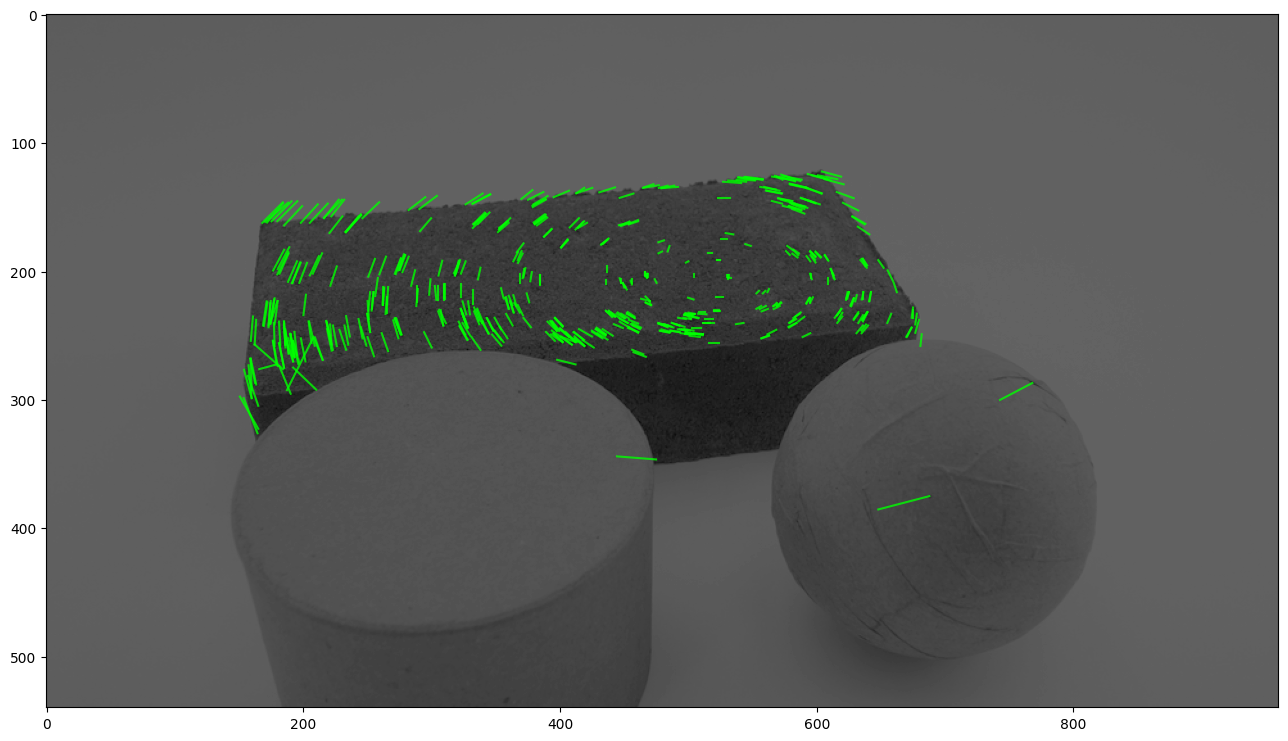

In [12]:
fig = figure(0, (22, 9))
imshow(gray_2*0.4, cmap = 'gray', vmax = 255, vmin = 0) #Darken image to make it easier to see flow lines

for i in range(len(matching_keypoints_1)):
    plot([matching_keypoints_1[i].pt[0], matching_keypoints_2[i].pt[0]],
         [matching_keypoints_1[i].pt[1], matching_keypoints_2[i].pt[1]], alpha = 0.8, c = (0, 1, 0))


In [13]:
p1 = []
p2 = []

for i in range(len(matching_keypoints_1)):
    p1.append([matching_keypoints_1[i].pt[0], matching_keypoints_1[i].pt[1]])
    p2.append([matching_keypoints_2[i].pt[0], matching_keypoints_2[i].pt[1]])

p1 = np.array(p1)
p2 = np.array(p2)

In [14]:
f, inliers =  cv2.findFundamentalMat(points1 = p1,
                                     points2 = p2,
                                     method = cv2.FM_RANSAC,
                                     ransacReprojThreshold = 2.0)

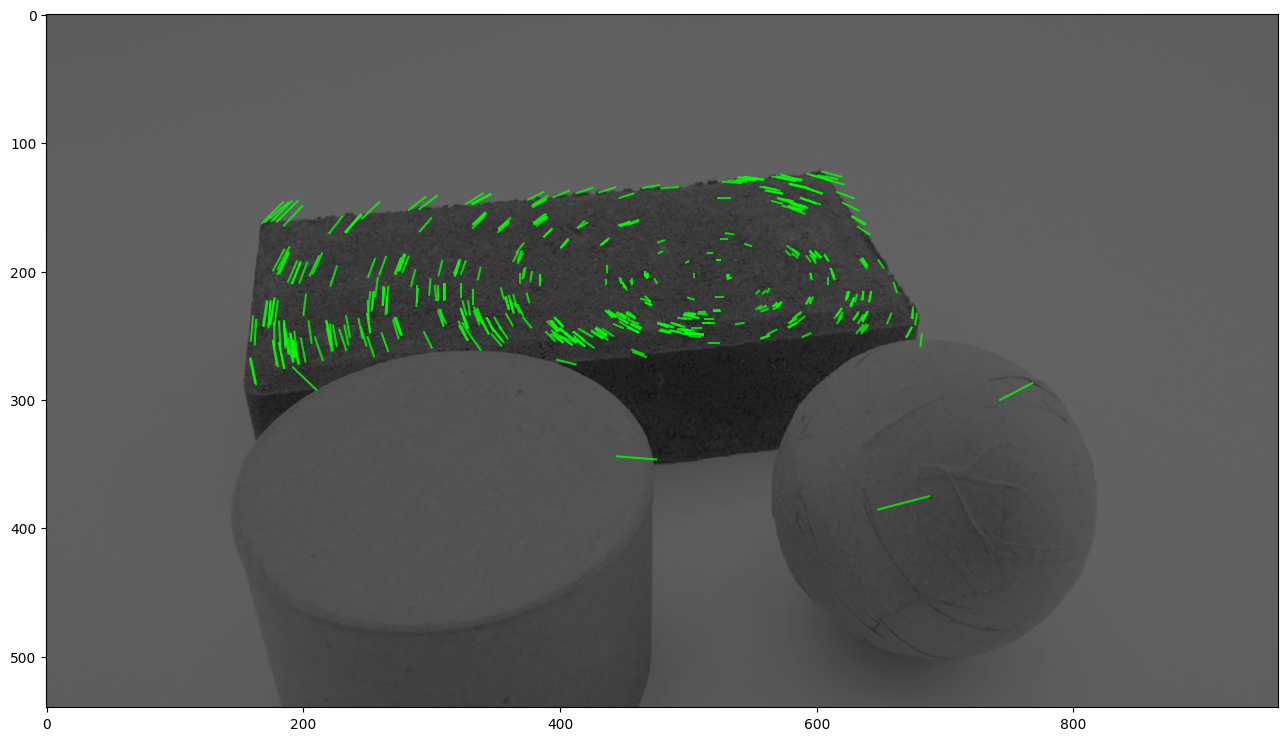

In [15]:
fig = figure(0, (22, 9))
imshow(gray_2*0.4, cmap = 'gray', vmax = 255, vmin = 0) #Darken image to make it easier to see flow lines

for i in range(len(matching_keypoints_1)):
    if inliers[i]:
        plot([matching_keypoints_1[i].pt[0], matching_keypoints_2[i].pt[0]],
             [matching_keypoints_1[i].pt[1], matching_keypoints_2[i].pt[1]],
              alpha = 0.8,
              c = (0, 1, 0))